# Tópicos selectos de análisis de datos
# Tarea 2

# Alumno: Marcelo Alberto Sanchez Zaragoza

| Descripción:                         | Fechas                  |
|--------------------------------------|-------------------------|
| Fecha de publicación del documento:  | **Septiembre 15, 2021** |
| Fecha límite de entrega de la tarea: | **Septiembre 24, 2021** |

## Instrucciones:

- Entrega un solo jupyter notebook por tarea. Incluye cualquier archivo, imagen, datos, etcétera, para que pueda ejecutarse. Si lo crees conveniente, puedes usar latex para los ejercicios que lo requieran.

- Usa python 3.x 

- Todos tus archivos DEBES nombrarlos con el siguiente formato: TareaXXX_Nombre_Apellido.ipynb, TareaXXX_Nombre_Apellido.pdf, TareaXXX_Nombre_Apellido.csv, etcétera.

- Crea una carpeta con nombre TareaXXX_Nombre_Apellido donde incluirás todos tus archivos, y entrega UN SOLO archivo ZIP usando el mismo formato para el nombre: TareaXXX_Nombre_Apellido.zip

- Manda las tareas con nuestros ayudantes: marco.perez@cimat.mx y javier.carrillo@cimat.mx (opcionalmente con copia a mi)

- LAS TAREAS SON INDIVIDUALES, a menos que se especifique lo contrario


---

Para los ejercicios vamos a usar los datos generados por el modelo 

$$  f(x; \theta) = f(x; A, \omega, \phi) =  A\sin(\omega x + \phi)$$

y la función que mide el ajuste del modelo 

$$ L(\theta;  \mathbf{X},  \mathbf{y}) = \frac{1}{n} \sum_{i=1}^n ( f(x_i; \theta)  - y_i )^2 $$

donde  $\mathbf{X} = (x_1, x_2, ..., x_n)$ y $\mathbf{y} = (y_1, y_2, ..., y_n)$
y los puntos $(x_i, y_i)$ están generados por el siguiete código.

Parámetros generadores:  13 1.2 0.6


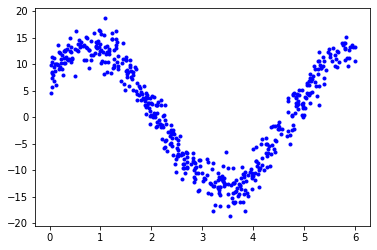

In [122]:
import numpy as np
import matplotlib.pyplot as plt

# Modelo
def fnc_f(x, theta):
    A,w,phi = theta
    return A*np.sin(w*x + phi)

A   = 13
w   = 1.2
phi = 0.6
print('Parámetros generadores: ', A, w, phi)

# Generación de los datos del problema, almacenados en los arreglos X,y
X     = np.random.rand(2**9)*6
theta = (A, w, phi)
y     = fnc_f(X, theta) + 2*np.random.randn(len(X))

# Gráfica de los datos
plt.plot(X, y, 'b.')

Usamos como punto inical  $\theta_0 = (18, 0.6, 0)$

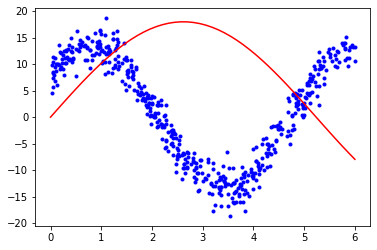

In [123]:
theta0 = [18, 0.6, 0]

vx     = np.linspace(0, 6, 50)
plt.plot(X, y, 'b.')
plt.plot(vx, fnc_f(vx, theta0), 'r')

----

## Ejercicio 1 (5 puntos)

Programar y probar el método de descenso de gradiente estocástico (SGD) con momentum de Nesterov para minimizar una función $L(\theta; \mathbf{X},  \mathbf{y})$ que mide el ajuste que tiene un modelo $f(x;\theta)$ a un conjunto de datos $\{(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)\}$, de modo que

$$ f(x_i;\theta) = y_i + e_i \quad i=1,2,...,n, $$

donde $e_i$ es el error del modelo, $\mathbf{X} = (x_1, x_2, ..., x_n)$ y $\mathbf{y} = (y_1, y_2, ..., y_n)$.

La función que implementa el algoritmo debe recibir como parámetros:

- Un punto inicial $\theta_0$
- El gradiente de la función $L(\theta; \mathbf{X},  \mathbf{y})$ 
- Los arreglos $X$ y $\mathbf{y}$
- El tamaño $m$ del batch
- El número de épocas 
- Dos tolerancias $\tau_1, \tau_2$ 
- Un vector inicial de velocidad $v$
- El valor del learning rate $\epsilon>0$
- El factor $\alpha>0$

Esta función en cada época debe generar los bloques de datos (batches), usando una función como la que se muestra en la página 30 de las diapositivas, y luego usado cada batch hay que aplicar los pasos descritos en el algoritmo de la página 37.

Hay que usar como criterio de paro:
- El número de épocas o 
- La norma del gradiente de  $L(\theta; \mathbf{X},  \mathbf{y})$  sea menor que $\tau_1$.
- La norma de $v$ menor que $\tau_2$, que eso significa que no hay un incremento significativo en la variable $\theta$.

Hay que almacenar la secuencia de puntos $\theta$ que se van 
generando en cada iteración. La función debe devolver esta secuencia 
y el número de iteraciones realizadas.

1. Implementar el algoritmo el método de descenso de gradiente estocástico (SGD) con momentum de Nesterov como se describió.
2. Probar el algoritmo para el conjunto de puntos  y el modelo dados usando el
   punto inicial $\theta=(A, \omega, \phi) = (18, 0.6, 0)$, el valor
   $\alpha=0.001$, una tolerancia $\tau_1=0.01$, $\tau_2=0.0001$, $v = (0,0,0)$, $5000$ épocas (puede ajustar este valor si es necesario) y los
   tamaños de batch  $m = 16$ y $m=128$.
   Para cada $m$, probar el algoritmo usando learning rate $\epsilon=0.01$ y $\epsilon= 0.0001$
3. Reporte 

- el valor inicial $L(\theta_0; \mathbf{X},  \mathbf{y})$
- el valor de $\theta$ final obtenido, 
- el valor $L(\theta; \mathbf{X},  \mathbf{y})$ en  $\theta$ final,
- la norma del gradiente de $L(\theta; \mathbf{X},  \mathbf{y})$ evaluado en el valor final de $\theta$,
- el número de iteraciones realizadas, 
- el tiempo de cómputo,
- la gráfica del modelo $f(x;\theta)$ usando el valor de $\theta$ final comparada con los datos para apreciar el ajuste,
- una gráfica con los valores de $L(\theta_k; \mathbf{X},  \mathbf{y})$
  donde $\theta_k$ son los puntos generados por el algoritmo, 
- una gráfica del gradiente de $L$ evaluada en los puntos $\theta_k$, y
- una gráfica 3D de los puntos $\theta_k$ generados por el algoritmo.

4. Escriba un comentario sobre el efecto de los parámetros en los resultados del optimizador.

### Solución:

#### En el siguiente Jupyter Notebook se muestra la implementación del método que nos solicitan y las funciones que se ocupan en el mismo, así como una explicación de lo que se esta realizando. Las explicaciones de los gráficos, resultados y conclusiones se anexan en un archivo PDF.

In [104]:
# La función que nos va a ayudar a realizar la tarea de minibatches
import random
import numpy as np

# En la siguiente función pide como datos el conjunto de datos X, Y, tamaño del minibatch
# La siguiente función esta adaptada para casos donde tenemos datos de solo una dimension
def kobe_minibatches(X,y,minibatch_size):
    m = X.shape[0]
    minibatches = []
    s = list(zip(X, y))
    random.shuffle(s)
    X,y = zip(*s)
    for i in range (0,m,minibatch_size):
        X_batch = X[i:i+minibatch_size]
        y_batch = y[i:i+minibatch_size]
        minibatches.append((X_batch,y_batch))
    return minibatches

In [105]:
# En la siguiente función se pide el valor del gradiente, en este caso ocupamos las derivadas ya que conocemos la expresión
#  desde un inicio, en dicha función ingresamos los datos y el vector tetha, al final regresa un vector con tres componentes
def jordan_evaluar(X, y, tetha):
    A = tetha[0]
    w = tetha[1]
    phi = tetha[2]
    m = len(y)
    g_A = 0
    g_w = 0
    g_phi = 0
    for i in range(m):
        g_A = g_A + 2*(A*np.sin(w*X[i] + phi) - y[i] )*( np.sin(w*X[i] + phi) )
        g_w = g_w + 2*(A*np.sin(w*X[i] + phi) - y[i] )*( A*np.cos(w*X[i] + phi) )*(X[i])
        g_phi = g_phi + 2*(A*np.sin(w*X[i] + phi) - y[i] )*( A*np.cos(w*X[i] + phi) )
    l = np.array([g_A/m, g_w/m, g_phi/m])
    return l

In [113]:
from time import time
# En la siguiente función es el desarrollo del algoritmo, donde solicitamos el valor de tetha, los datos (X y Y), el tamaño
#  del minibatch, las dos tolerancias, un vector velocidad inicial, un tamaño de paso y finalmente un valor alpha.

def manu_SGD(tetha_0, X, y, m, epo, t_1, t_2, v, e_1, a):
    start_time = time() # tomamos el tiempo inicial cuando la función es llamada
    t = 0
    ite = 0
    norma_1 = 1.1 # definimos dos normas de forma temporal
    norma_2 = 1.1
    tetha = tetha_0
    tetha_e = tetha_0
    l = [] # vector vacio para guardar los valores de theta
    g_v = [] # lista vacia para guardar los valores del gradiente
    while(t<epo and norma_1>t_1 and norma_2>t_2): # damos las condiciones de paro del algoritmo
        mini_b = kobe_minibatches(X,y,m) # en cada iteracion solocitamos un nuevo conjunto de minibatches
        n = len(mini_b)
        for i in range(n): # con este for recorremos el conjunto de minibatches
            xx = mini_b[i] # vamos tomando cada uno de los minibatch
            tetha_e = tetha + a*v # Obtenemos nuestro theta' ya que así nos dice el algoritmo
            g = jordan_evaluar(xx[0],xx[1], tetha_e) # solicitamos el valor del gradiente con los datos del minibatch y theta'
            v = a*v - e_1*g # Actualizamos nuestro vector velocidad
            tetha = tetha + v # Finalmente actualizamos los valores de nuestra variable theta
            l.append(tetha) # guardamos los valores de cada iteración
            g_v.append([g[0],g[1],g[2]]) # guardamos los valores del gradiente en cada evaluación
            ite = ite + 1
        t = t+1 # actulizamos el numero de iteraciones
        norma_1 = np.sqrt(g[0]**2 + g[1]**2 + g[2]**2) # actualizamos la norma del vector gradiente
        norma_2 = np.sqrt(v[0]**2 + v[1]**2 + v[2]**2) # actualizamos la norma del vector velocidad
    elapsed_time = time() - start_time # tomamos el tiempo una vez que termina el algoritmo
    print('El valor del último theta:', tetha)
    print('El valor del gradiente evaluado en el último theta:', g) # imprimimos el vector gradiente
    print('La norma del gradiente evaluado en el último theta:', norma_1) # el valor de la norma evaluada en el ultimo theta
    print('El número de iteraciones fue:',ite) # imprimimos el número de iteraciones en cada proceso
    print('El tiempo de cómputo fue:',elapsed_time) # imprimos el tiempo de computo
    return(l, g, norma_1, t, elapsed_time, g_v)# lista, gradiente_evaluado, norma, iteraciones, tiempo de computo

In [114]:
tetha_0 = np.array([18, 0.6, 0]) # punto inicial
a = 0.001
t_1 = 0.01 # tolerancia 1
t_2 = 0.0001 # tolerancia 2 
v = np.array([0,0,0]) # vector inicial v
epo = 5000 # numero de epocas
m_1 = 16 # tamaño de batch_1
m_2 = 128 # tamaño de batch_2
e_1 = 0.01
e_2 = 0.0001

In [121]:
marcelo = manu_SGD(tetha_0, X, y, m_2, epo, t_1, t_2, v, e_1, a)

El valor del último theta: [ 1.57689699 16.49334099  3.81656022]
El valor del gradiente evaluado en el último theta: [1.89012658 5.8884223  0.93695413]
La norma del gradiente evaluado en el último theta: 6.254916363007221
El número de iteraciones fue: 20000
El tiempo de cómputo fue: 27.56212019920349


In [116]:
s11 = len(marcelo[0])
mm = marcelo[0]
mm[s11-2]

array([13.05316112,  1.20371495,  0.60291842])

En la siguiente linea vamos a gráficar los datos y ajustaremos el vector $\theta_{final}$ que nos resulto.

Text(0.5, 1.0, 'Gráfica SGD con momentum de Nesterov')

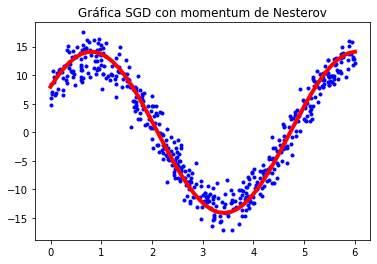

In [110]:
theta0 = [18, 0.6, 0]
tetha_f = mm[s11-2]
vx     = np.linspace(0, 6, 50)
plt.plot(X, y, 'b.')
#plt.plot(vx, fnc_f(vx, theta0), 'r')
plt.plot(vx, fnc_f(vx, tetha_f), 'r',linewidth=4)
plt.title('Gráfica SGD con momentum de Nesterov')

In [117]:
# función para medir el ajuste del modelo
def lebron_ajuste(y_1, y):
    m = len(y)
    suma = 0
    for i in range(m):
        suma = suma + (y_1[i] - y[i])**2
    valor = suma/m
    return valor

In [118]:
theta0 = mm[s11-2]
tetha_0
vx = np.linspace(0, 6, 512)
y_1 = fnc_f(X, theta0)
s = lebron_ajuste(y_1, y)
s

4.131040836916111

En la siguiente linea vamos a realizar el gráfico correspondiente a los valores que nos resultaron de la funcion L.

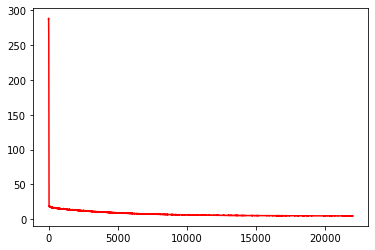

In [90]:
l = []
for i in range(len(mm)):
    t = mm[i]
    y_1 = fnc_f(X, t)
    s = lebron_ajuste(y_1,y)
    l.append(s)
plt.plot(l, 'r')

En las siguientes lineas buscamos el gráfico correspondiente a los valores de $\theta_k$ en cada una de las iteraciones.

In [91]:
import pandas as pd
p_1 = pd.DataFrame(mm)
x = list(p_1.iloc[:,0])
y = list(p_1.iloc[:,1])
z = list(p_1.iloc[:,2])

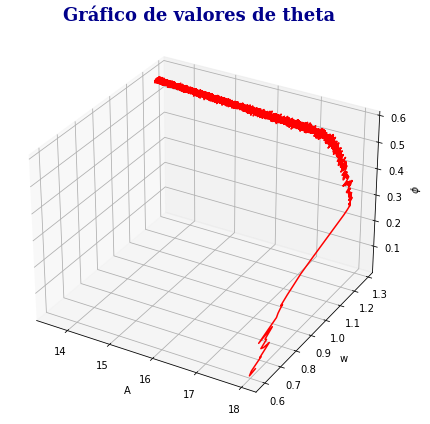

In [92]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

#A , w , phi = coor(thetas)
fig=plt.figure(figsize=(15,6))
axes = plt.axes(projection="3d")
axes.plot3D(x,y,z,color="red")
axes.set_title("Gráfico de valores de theta ",fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
axes.set_xlabel("A")
axes.set_ylabel("w")
axes.set_zlabel("$\\phi$")
plt.tight_layout()
plt.show()

Realizamos una ligera rotación del gráfico, solo con fines ilustrativos.

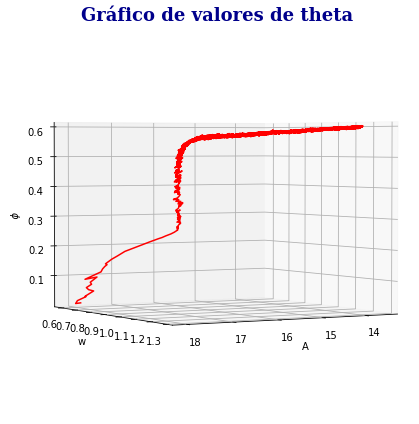

In [93]:
fig=plt.figure(figsize=(15,6))
axes = plt.axes(projection="3d")
axes.plot3D(x,y,z,color="red")
axes.set_title("Gráfico de valores de theta",fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
axes.view_init(elev=2, azim=60)
axes.set_xlabel("A")
axes.set_ylabel("w")
axes.set_zlabel("$\\phi$")
plt.tight_layout()
plt.show()

En las siguientes lineas realizamos el gráfico correspondiente al valor del gradiente en cada iteración de $\theta_k$.

Text(0.5, 1.0, 'Gradiente')

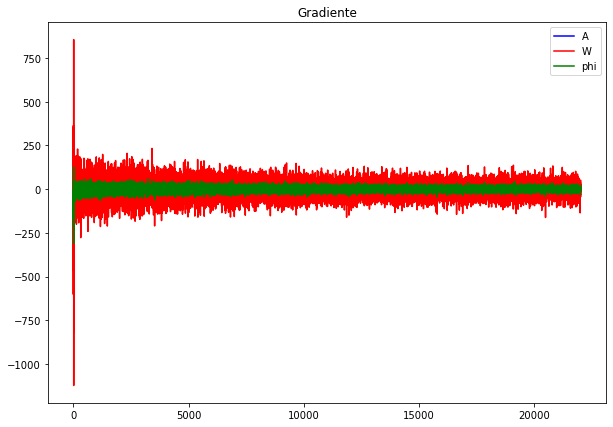

In [94]:
ss = marcelo[5]
p_2 = pd.DataFrame(ss)
x2 = list(p_2.iloc[:,0])
y2 = list(p_2.iloc[:,1])
z2 = list(p_2.iloc[:,2])
fig = plt.figure(figsize=(10,7))
plt.plot(x2,'blue',label='A')
plt.plot(y2,'red',label='W')
plt.plot(z2,'green',label='phi')
plt.legend()
plt.title('Gradiente')

Con fines ilustrativos seleccionamos datos del conjunto final para observar como va cambiando los valores.

Text(0.5, 1.0, 'Gradiente')

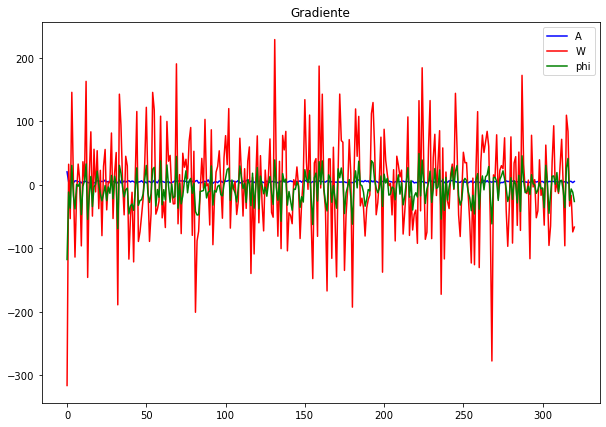

In [95]:
alpha = [x2[0]]
w = [y2[0]]
phi = [z2[0]]
for i in range(320):
    alpha.append(x2[i+50])
    w.append(y2[i+50])
    phi.append(z2[i+50])

fig = plt.figure(figsize=(10,7))
plt.plot(alpha,'blue',label='A')
plt.plot(w,'red',label='W')
plt.plot(phi,'green',label='phi')
plt.legend()
plt.title('Gradiente')

## Ejercicio 2 (5 puntos)

Programar y probar el algoritmo RMSProp.

1. Escriba una función que implemente el algoritmo RMSProp.
2. Repetir las pruebas del Ejercicio 1 y reportar los resultados de la misma manera usando $\rho=0.9$ (página 44 de las diapositivas).
3. Escriba un comentario sobre el efecto de los parámetros en los resultados del optimizador y un comentario sobre una comparación de los dos algoritmos.

### Solución:

#### Al igual que en el ejercicio anterior se muestra la implementación del método que nos solicitan y las funciones que se ocupan en el mismo, así como una explicación de lo que se esta realizando. Las explicaciones de los gráficos, resultados y conclusiones se anexan en un archivo PDF.

In [124]:
from time import time

# En la siguiente función es el desarrollo del algoritmo, donde solicitamos el valor de tetha, los datos (X y Y), el tamaño
#  del minibatch, las dos tolerancias, un vector velocidad inicial, un tamaño de paso y finalmente un valor p.
def manu_RMSProp(tetha_0, X, y, m, epo, t_1, t_2, e_1, p):
    start_time = time() # tomamos el tiempo inicial cuando la función es llamada
    t = 0 # inicializamos la variable que nos ayuda a contar el numero de epocas
    ite = 0 # inicializamos la variable que nos ayuda a contar el numero de iteraciones
    norma_1 = 1.1 # inicializamos valores auxiliares para las normas
    norma_2 = 1.1
    tetha = tetha_0
    l = [] # lista vacia para guardar los valores de theta
    g_v = [] # lista vacia para guardar los valores del gradiente
    r = 0 
    s = 0.0000001
    while( t<epo and norma_1>t_1 and norma_2>t_2): # damos las condiciones de paro del algoritmo
        mini_b = kobe_minibatches(X,y,m) # en cada iteracion solocitamos un nuevo conjunto de minibatches
        n = len(mini_b)
        for i in range(n): # con este for recorremos el conjunto de minibatches
            xx = mini_b[i] # vamos tomando cada uno de los minibatch
            g = jordan_evaluar(xx[0],xx[1], tetha) # solicitamos el valor del gradiente
            r = p*r + (1-p)*(g*g) # actualizamos el valor de la variable r
            incre = -1*(e_1/ np.sqrt(s+r) )*g # nos ayuda a encontrar el paso adecuada para cada parámetro
            tetha = tetha + incre # actualizamos el vector theta
            l.append(tetha) # guardamos el valor de theta en cada iteración
            g_v.append([g[0],g[1],g[2]]) # guardamos del gradiente de theta en cada iteración
            ite = ite + 1 # se cuenta el numero de iteraciones
        t = t+1 # vamos contamos el numero de épocas
        norma_1 = np.sqrt(g[0]**2 + g[1]**2 + g[2]**2) # actualizamos el valor de la norma del vactor gradiente
        norma_2 = np.sqrt(tetha[0]**2 + tetha[1]**2 + tetha[2]**2) # actualizamos el valor de la norma del vector theta
    elapsed_time = time() - start_time # Tomamos el tiempo final por medio de una resta
    print('El valor del último theta:', tetha)
    print('El valor del gradiente evaluado en el último theta:', g) # imprimimos el vector gradiente
    print('La norma del gradiente evaluado en el último theta:', norma_1) # el valor de la norma evaluada en el ultimo theta
    print('El número de iteraciones fue:',ite) # imprimimos el número de iteraciones en cada proceso
    print('El tiempo de cómputo fue:',elapsed_time) # imprimos el tiempo de computo
    return(l, g, norma_1, t, elapsed_time, g_v)# lista, gradiente_evaluado, norma, iteraciones, tiempo de computo

In [125]:
tetha_0 = np.array([18, 0.6, 0]) # punto inicial
p = 0.9 #0.1 # nuevo valor que necesitamos
t_1 = 0.01 # tolerancia 1
t_2 = 0.0001 # tolerancia 2 
v = np.array([0,0,0]) # vector inicial v
epo = 1000 # numero de epocas
m_1 = 16 # tamaño de batch_1
m_2 = 128 # tamaño de batch_2
e_1 = 0.01
e_2 = 0.0001

In [144]:
marcelo = manu_RMSProp(tetha_0, X, y, m_1, epo, t_1, t_2, e_2, p)

El valor del último theta: [14.87058756  0.71637551 -0.58336275]
El valor del gradiente evaluado en el último theta: [ 13.76491372 -39.63593786 -24.53935997]
La norma del gradiente evaluado en el último theta: 48.60720736232903
El número de iteraciones fue: 32000
El tiempo de cómputo fue: 6.1703996658325195


In [133]:
s12 = len(marcelo[0])
mm = marcelo[0]
mm[s12-2]

array([13.3638356 ,  1.20570792,  0.59329926])

En la siguiente linea vamos a gráficar los datos y ajustaremos el vector $\theta_{final}$ que nos resulto.

Text(0.5, 1.0, 'Gráfica con RMSProp')

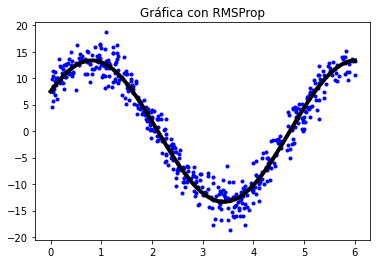

In [136]:
theta0 = [18, 0.6, 0]
tetha_f = mm[s12-2]
vx     = np.linspace(0, 6, 50)
plt.plot(X, y, 'b.')
#plt.plot(vx, fnc_f(vx, theta0), 'r')
plt.plot(vx, fnc_f(vx, tetha_f), 'k',linewidth=4)
plt.title('Gráfica con RMSProp')

In [137]:
vx = np.linspace(0, 6, 512)
y_1 = fnc_f(X, tetha_f)
s = lebron_ajuste(y_1, y)
s

4.26691421391049

En la siguiente linea vamos a realizar el gráfico correspondiente a los valores que nos resultaron de la funcion L.

Text(0.5, 1.0, 'Gráfica con RMSProp')

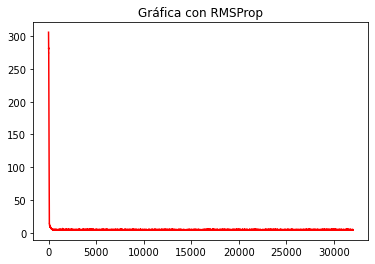

In [138]:
l = []
for i in range(len(mm)):
    t = mm[i]
    y_1 = fnc_f(X, t)
    s = lebron_ajuste(y_1,y)
    l.append(s)
plt.plot(l, 'r')
plt.title('Gráfica con RMSProp')

En las siguientes lineas buscamos el gráfico correspondiente a los valores de $\theta_k$ en cada una de las iteraciones.

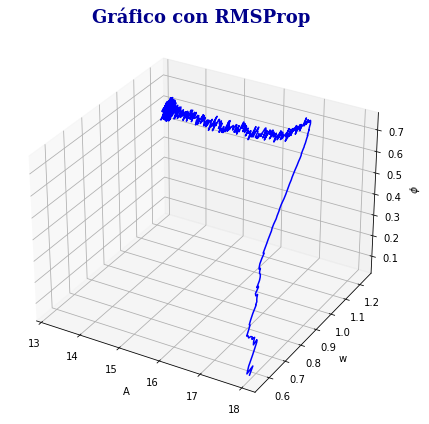

In [139]:
p_1 = pd.DataFrame(mm)
x = list(p_1.iloc[:,0])
y = list(p_1.iloc[:,1])
z = list(p_1.iloc[:,2])

fig=plt.figure(figsize=(15,6))
axes = plt.axes(projection="3d")
axes.plot3D(x,y,z,color="blue")
axes.set_title("Gráfico con RMSProp",fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
axes.set_xlabel("A")
axes.set_ylabel("w")
axes.set_zlabel("$\\phi$")
plt.tight_layout()
plt.show()

Realizamos una ligera rotación del gráfico, solo con fines ilustrativos.

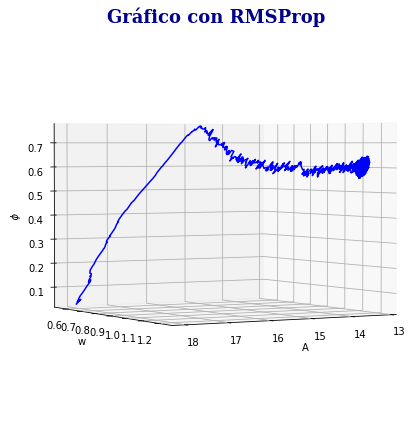

In [140]:
fig=plt.figure(figsize=(15,6))
axes = plt.axes(projection="3d")
axes.plot3D(x,y,z,color="blue")
axes.set_title("Gráfico con RMSProp",fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})
axes.view_init(elev=2, azim=60)
axes.set_xlabel("A")
axes.set_ylabel("w")
axes.set_zlabel("$\\phi$")
plt.tight_layout()
plt.show()

En las siguientes lineas realizamos el gráfico correspondiente al valor del gradiente en cada iteración de $\theta_k$.

Text(0.5, 1.0, 'Gradiente con RMSProp')

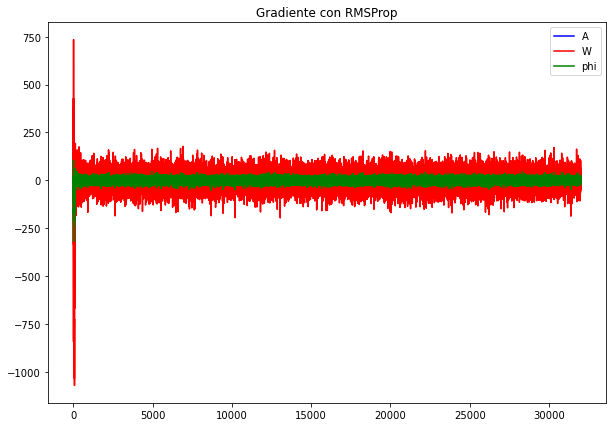

In [141]:
ss = marcelo[5]
p_2 = pd.DataFrame(ss)
x2 = list(p_2.iloc[:,0])
y2 = list(p_2.iloc[:,1])
z2 = list(p_2.iloc[:,2])

fig = plt.figure(figsize=(10,7))
plt.plot(x2,'blue',label='A')
plt.plot(y2,'red',label='W')
plt.plot(z2,'green',label='phi')
plt.legend()
plt.title('Gradiente con RMSProp')

Con fines ilustrativos seleccionamos datos del conjunto final para observar como va cambiando los valores.

Text(0.5, 1.0, 'Gradiente con RMSProp')

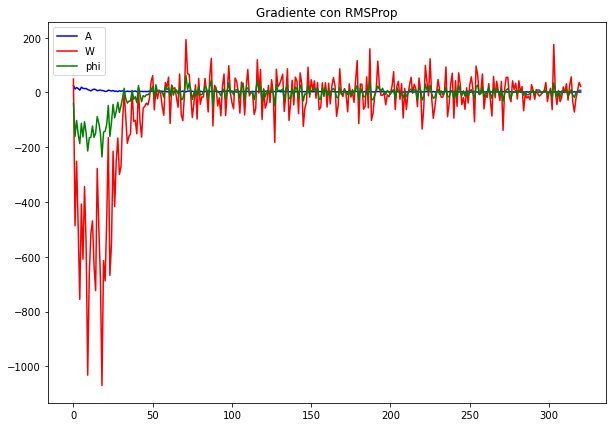

In [142]:
alpha = [x2[0]]
w = [y2[0]]
phi = [z2[0]]
for i in range(320):
    alpha.append(x2[i+50])
    w.append(y2[i+50])
    phi.append(z2[i+50])

fig = plt.figure(figsize=(10,7))
plt.plot(alpha,'blue',label='A')
plt.plot(w,'red',label='W')
plt.plot(phi,'green',label='phi')
plt.legend()
plt.title('Gradiente con RMSProp')

In [76]:
len(X)

512